## COMP 4432
### Assignment 5
#### Michael Ghattas

In [25]:
# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

### Part 1

In [26]:
# Load the dataset
df = pd.read_csv("Assignment5_Data-3.csv")
df.head()

,x1,x2
0,-2.505828,4.231421
1,-2.015031,2.577902
2,-0.778732,3.736001
3,-1.525042,2.950457
4,-0.619687,2.703252


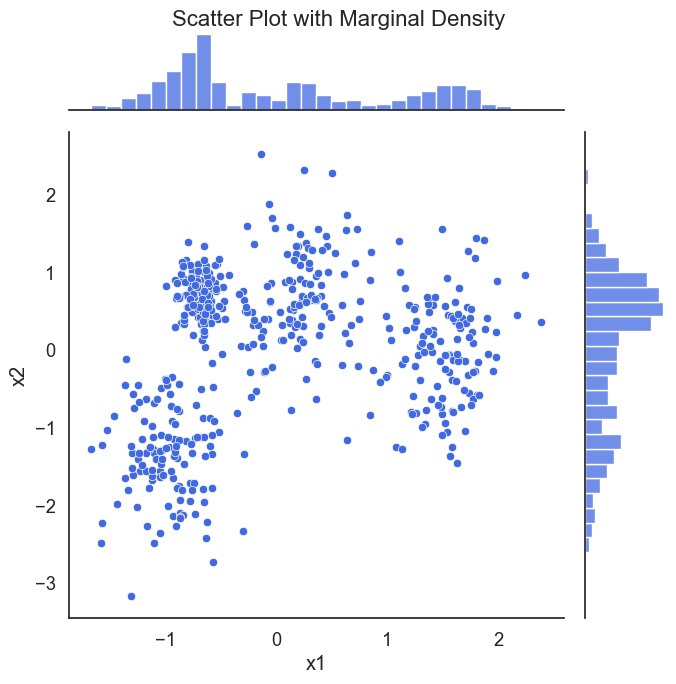

In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert to DataFrame for plotting
scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

# Create scatterplot with marginal density plots
sns.set(style="white", font_scale=1.2)
g = sns.jointplot(
    data=scaled_df,
    x=scaled_df.columns[0],
    y=scaled_df.columns[1],
    kind="scatter",
    height=7,
    marginal_kws=dict(bins=30, fill=True),
    color='royalblue'
)
g.fig.suptitle("Scatter Plot with Marginal Density", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

##### **i) Estimated Number of Clusters**
Based on the scatter plot and the marginal density plots:
- **Estimated clusters:** **3**
- This is inferred from the visible separation and grouping in the 2D feature space — three distinct dense regions are clearly observable.

##### **ii) Observations on Cluster Density and Overlap**
- **Density Consistency:**
  - The clusters in the left and bottom-left regions are more compact, indicating **high intra-cluster density**.
  - The central/right cluster appears slightly more **dispersed**, suggesting lower density or potential substructure within that group.
- **Ambiguity & Overlap:**
  - There is **noticeable overlap** between the clusters, particularly in the central region.
  - This can lead to **ambiguous cluster boundaries**, where data points near the edges may not clearly belong to one cluster.
- **Clustering Challenges:**
  - **KMeans** may assign points strictly based on proximity to centroids, which can cause errors in overlapping areas.
  - **Density-based methods** (like DBSCAN) may struggle if the clusters have **varying densities**, as seen here.
  - The **shape of clusters** (not being perfectly spherical) could mislead distance-based algorithms.

Overall, while three clusters are a reasonable estimate, further validation using metrics (e.g., silhouette score, Davies-Bouldin score) and alternative clustering methods is essential for robust conclusions.


### Part 2

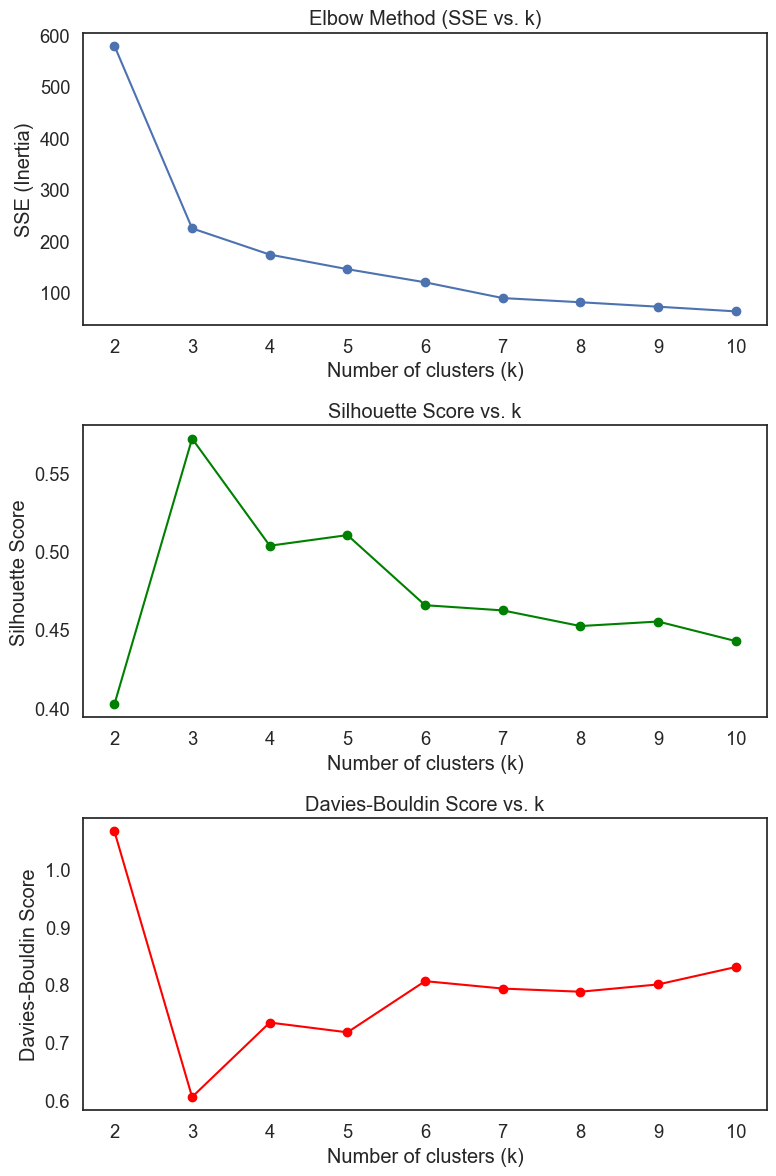

In [28]:
# Evaluate KMeans for a range of k values
sse = []
silhouette_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, labels))
    db_scores.append(davies_bouldin_score(scaled_df, labels))

# Plot the Elbow, Silhouette, and Davies-Bouldin curves
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Elbow plot
axs[0].plot(k_range, sse, marker='o')
axs[0].set_title("Elbow Method (SSE vs. k)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("SSE (Inertia)")

# Silhouette Score plot
axs[1].plot(k_range, silhouette_scores, marker='o', color='green')
axs[1].set_title("Silhouette Score vs. k")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Silhouette Score")

# Davies-Bouldin Score plot
axs[2].plot(k_range, db_scores, marker='o', color='red')
axs[2].set_title("Davies-Bouldin Score vs. k")
axs[2].set_xlabel("Number of clusters (k)")
axs[2].set_ylabel("Davies-Bouldin Score")

plt.tight_layout()
plt.show()

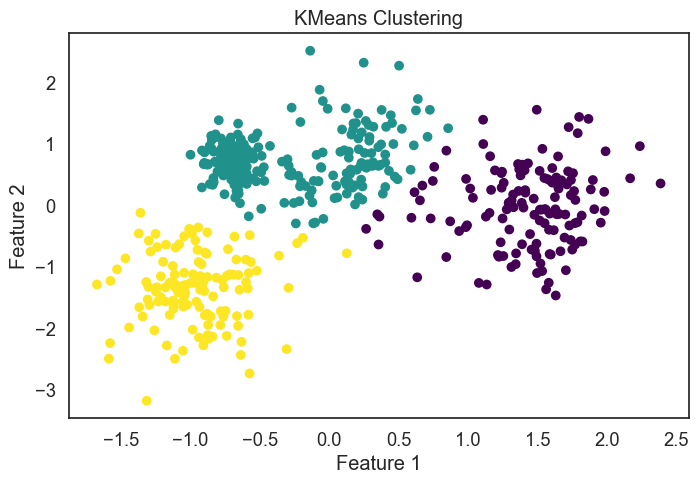

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##### Optimum Number of Clusters from Each Method
- **Elbow Method (SSE vs. k)**:  
  The SSE curve shows a clear "elbow" at **k = 3**, where the rate of decrease in inertia slows down. This suggests that 3 clusters provide the best balance between compactness and parsimony.
- **Silhouette Score**:  
  The silhouette score peaks at **k = 3**, with a maximum value of approximately **0.57**. This indicates that the clustering structure is well defined and the clusters are compact and well separated at this point.
- **Davies-Bouldin Score**:  
  The Davies-Bouldin score reaches its minimum at **k = 3**, indicating the best clustering quality with the lowest intra-cluster variance relative to inter-cluster separation.

##### Summary
All three evaluation methods consistently indicate that **k = 3** is the optimal number of clusters:
- The **Elbow Method** shows a notable inflection point at 3 clusters.
- The **Silhouette Score** is maximized at 3 clusters.
- The **Davies-Bouldin Score** is minimized at 3 clusters.
- **Clustering Quality**: Reasonably good based on visual separation and evaluation metrics.

### Part 3

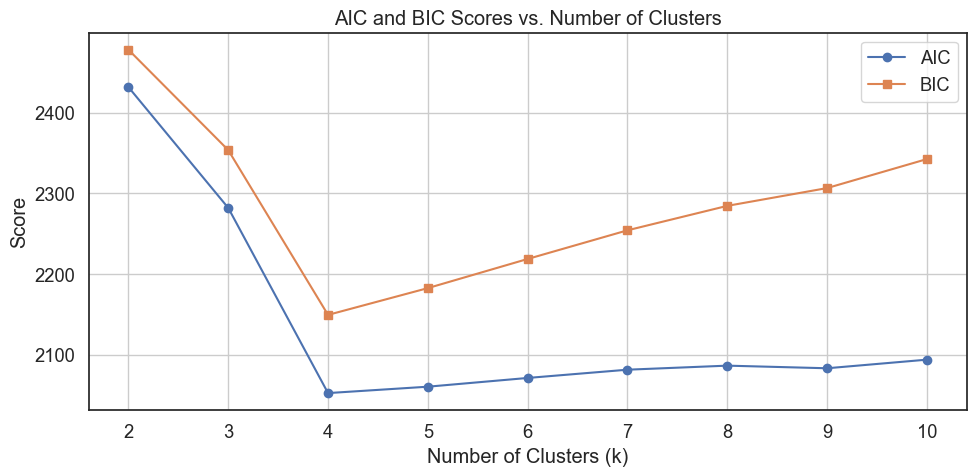

In [30]:
# Store AIC and BIC values for each k
aic_scores = []
bic_scores = []
ks = range(2, 11)  # Try k from 2 to 10

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))

# Plot AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(ks, aic_scores, label='AIC', marker='o')
plt.plot(ks, bic_scores, label='BIC', marker='s')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('AIC and BIC Scores vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Optimal Number of Clusters Based on AIC and BIC
- Both **AIC** and **BIC** decrease significantly until **k = 4**, after which the scores begin to plateau or increase.
- The **lowest AIC score** is observed at **k = 4**.
- The **lowest BIC score** is also observed at **k = 4**.

In [31]:
# Fit Gaussian Mixture Model with k=4
gmm_model = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm_model.fit(X_scaled)  # X_scaled is the standardized data

# Predict the cluster labels for the dataset
gmm_labels = gmm_model.predict(X_scaled)

# Add the cluster labels to the original DataFrame if needed
df['GMM_Cluster'] = gmm_labels

### Part 4

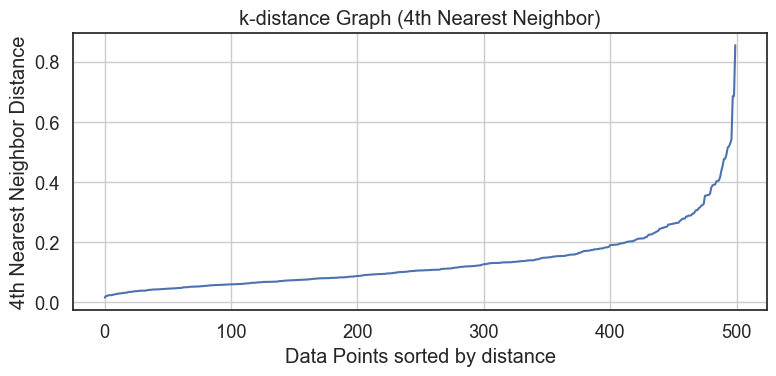

In [32]:
# Select min_samples
min_samples = 4  # rule of thumb: 2 * number of dimensions

# Estimate optimal epsilon using k-distance plot
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-distance Graph (4th Nearest Neighbor)")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Estimated epsilon from the elbow (to be visually confirmed)
eps = 0.4

In [33]:
# Fit DBSCAN with chosen hyperparameters
dbscan_model = DBSCAN(eps=0.4, min_samples=4)
dbscan_model.fit(scaled_df)

# Get predicted labels
dbscan_labels = dbscan_model.labels_

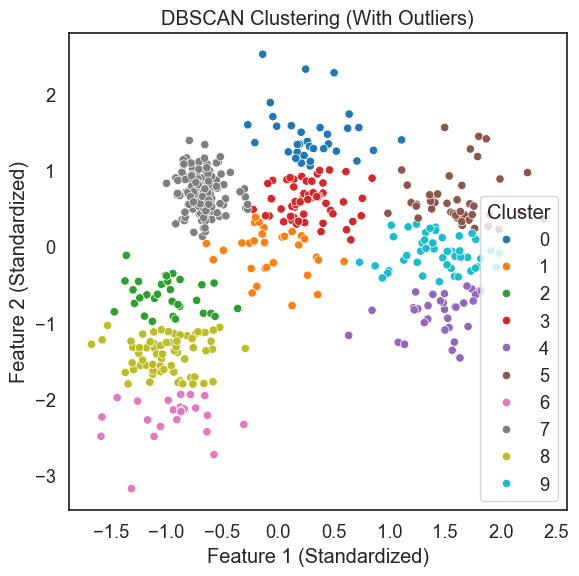

In [41]:
# Plot all points with DBSCAN labels
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='tab10', legend='full')
plt.title("DBSCAN Clustering (With Outliers)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

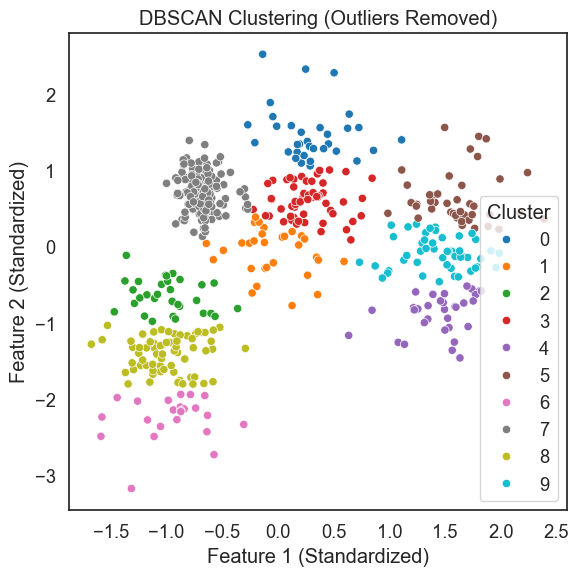

In [42]:
# Filter out outliers
dbscan_df = pd.DataFrame(X_scaled, columns=["Feature1", "Feature2"])
dbscan_df["label"] = labels
dbscan_df_filtered = dbscan_df[dbscan_df["label"] != -1]

# Plot without outliers
plt.figure(figsize=(6, 6))
sns.scatterplot(data=dbscan_df_filtered, x="Feature1", y="Feature2", hue="label", palette='tab10')
plt.title("DBSCAN Clustering (Outliers Removed)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

##### Visualization Analysis
- **With Outliers:**  
  The plot includes data points labeled `-1`, which DBSCAN classifies as **noise** or **outliers**. These points typically lie in low-density regions and are not assigned to any cluster. While their presence can help identify anomalous data, they may also obscure the clarity of cluster boundaries.
- **Without Outliers:**  
  After removing the outliers, the core structure of the clusters becomes more distinct. Each cluster is compact and well-separated, enhancing interpretability and making it easier to evaluate the model’s clustering effectiveness.
- **Should Epsilon Be Adjusted**
- Based on the **k-distance graph**, the chosen epsilon value (~0.25–0.3) appears to have been selected appropriately.
- The number of outliers is **reasonable and not excessive**.
- Clusters are **well-formed** and **distinct**, indicating effective separation.
- The algorithm captures the natural groupings without merging distinct clusters.
##### Evaluation:
- **Reducing Epsilon** could increase the number of outliers, potentially fragmenting existing clusters.
- **Increasing Epsilon** slightly could reduce noise, but risks merging neighboring clusters that should remain separate.

### Part 5

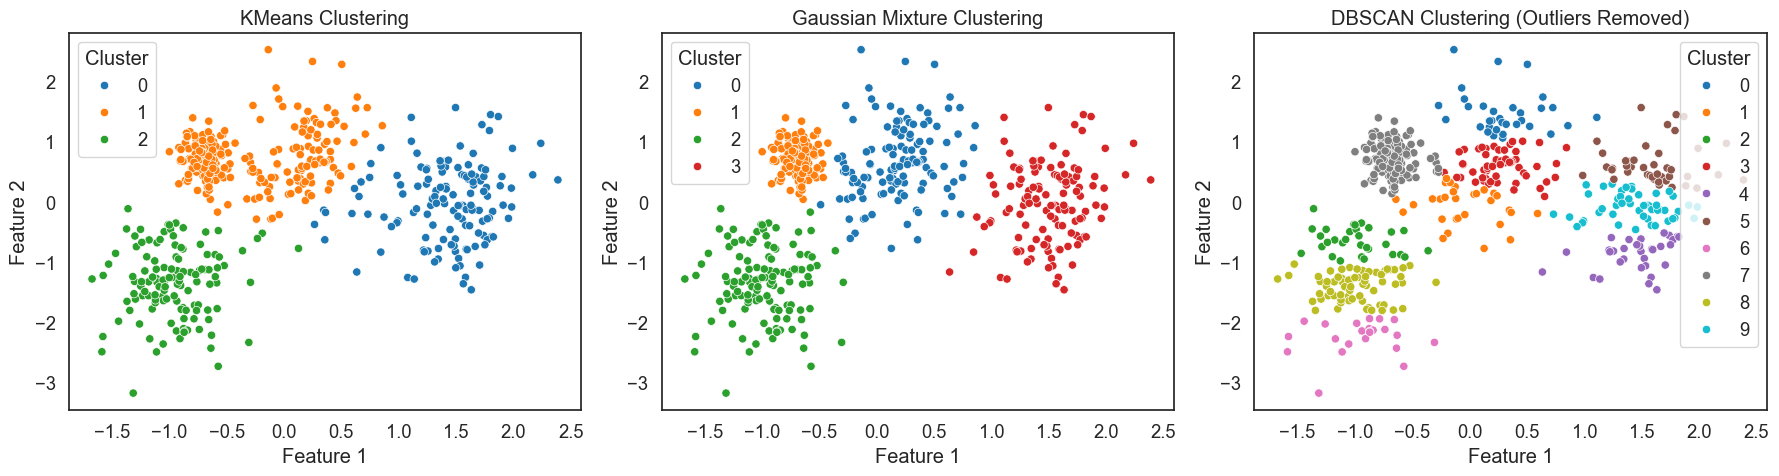

In [44]:
# Prepare labels
kmeans_labels = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)
gmm_labels = GaussianMixture(n_components=4, random_state=42).fit_predict(X_scaled)
dbscan_filtered_labels = dbscan_df_filtered["label"].values  # Already filtered outliers
dbscan_filtered_data = dbscan_df_filtered[["Feature1", "Feature2"]].values

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="tab10", ax=axes[0])
axes[0].set_title("KMeans Clustering")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].legend(title="Cluster")

# GMM plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette="tab10", ax=axes[1])
axes[1].set_title("Gaussian Mixture Clustering")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend(title="Cluster")

# DBSCAN (Filtered) plot
sns.scatterplot(x=dbscan_filtered_data[:, 0], y=dbscan_filtered_data[:, 1], hue=dbscan_filtered_labels, palette="tab10", ax=axes[2])
axes[2].set_title("DBSCAN Clustering (Outliers Removed)")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].legend(title="Cluster")

plt.tight_layout()
plt.show()

##### i) Best Clustering Method (Visual Inspection)
- **DBSCAN** identifies **10 distinct clusters** that align well with the visual distribution of the data and excludes outliers.
- Unlike **K-Means** and **GMM**, DBSCAN does **not assume cluster shape or size**, allowing it to model **arbitrary cluster boundaries**.
- It also detects **noise points/outliers**, which are ignored by K-Means and GMM.
In contrast:
- **K-Means** only identifies 3 clusters, clearly **underfitting** the data.
- **GMM** identifies 4 clusters and models overlaps better than K-Means but still **fails to capture the full cluster complexity**.

##### ii) Similarities and Differences Among Clustering Methods
| Feature                  | K-Means                          | Gaussian Mixture Model (GMM)         | DBSCAN                                   |
|--------------------------|----------------------------------|--------------------------------------|-------------------------------------------|
| Cluster Count            | 3 (predefined)                   | 4 (determined by BIC/AIC)           | 10 (emergent from density parameters)     |
| Cluster Shape            | Spherical                        | Elliptical                           | Arbitrary / non-convex                    |
| Overlap Handling         | ❌ Poor                          | ✅ Moderate                          | ✅ Good                                    |
| Outlier Detection        | ❌ No outlier handling           | ❌ No outlier handling               | ✅ Detects and excludes noise points      |
| Density Adaptability     | ❌ Uniform assumption            | ❌ Gaussian assumption               | ✅ Varies with data                       |
| Soft Assignment          | ❌ Hard cluster assignment       | ✅ Probabilistic cluster membership  | ❌ Hard assignment with noise label       |

##### iii) Comparison with Part 1 Expectations
| Criteria                | K-Means     | GMM         | DBSCAN      |
|-------------------------|-------------|-------------|-------------|
| Number of clusters      | ❌ Underestimated (3) | ❌ Slight underestimate (4) | ✅ Captured 10 clusters |
| Overlap Handling        | ❌ Poor     | ✅ Moderate | ✅ Strong    |
| Density Adaptability    | ❌ Assumes uniform | ❌ Assumes Gaussian | ✅ Adaptively handles varying densities |
| Outlier Handling        | ❌ None     | ❌ None     | ✅ Explicitly identifies outliers |

**Conclusion**: DBSCAN clearly outperforms the other clustering methods in identifying the natural structure of the dataset. It aligns well with prior expectations and demonstrates robust clustering performance under conditions of noise, density variation, and overlapping regions.


In [45]:
# Metrics for KMeans
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)

# Metrics for GMM
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_db = davies_bouldin_score(X_scaled, gmm_labels)

# Metrics for DBSCAN (filtered only)
dbscan_silhouette = silhouette_score(dbscan_df_filtered[["Feature1", "Feature2"]], dbscan_filtered_labels)
dbscan_db = davies_bouldin_score(dbscan_df_filtered[["Feature1", "Feature2"]], dbscan_filtered_labels)

# Print all metrics
print("Silhouette Scores:")
print(f"KMeans: {kmeans_silhouette:.3f}")
print(f"GMM:    {gmm_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

print("\nDavies-Bouldin Scores:")
print(f"KMeans: {kmeans_db:.3f}")
print(f"GMM:    {gmm_db:.3f}")
print(f"DBSCAN: {dbscan_db:.3f}")

Silhouette Scores:
KMeans: 0.572
GMM:    0.490
DBSCAN: 0.443

Davies-Bouldin Scores:
KMeans: 0.605
GMM:    0.785
DBSCAN: 0.830


##### i) Best Method per Metric
- **Silhouette Score (higher is better):**
  - **KMeans** performed best with a score of **0.572**
  - GMM: 0.490
  - DBSCAN: 0.443
- **Davies-Bouldin Score (lower is better):**
  - **KMeans** again performed best with a score of **0.605**
  - GMM: 0.785
  - DBSCAN: 0.830
##### ii) Do the Metric Values Align with Visual Assessment?
While **KMeans scored best numerically on both metrics**, this contradicts the **visual assessment from Part 5b**, where **DBSCAN was the most aligned with the true data structure** (more clusters, flexible shape, and outlier detection).
This discrepancy arises because:
- Silhouette and Davies-Bouldin Scores favor **compact, well-separated clusters**, which aligns with the assumptions of **KMeans** (spherical, equally sized clusters).
- These metrics **do not handle non-convex or density-based clusters well**, and penalize DBSCAN’s flexibility and noise labeling.
Thus, while the metrics favor KMeans, **they may be misleading in cases where clusters vary in shape, size, and density** — all of which are present in this dataset.

##### iii) Why the Disagreement Between Metrics?
The disagreement stems from the fact that:
- **Silhouette Score** evaluates **how well-separated and cohesive clusters are** — it measures the average distance between a sample and the nearest cluster that it is not a part of.
- **Davies-Bouldin Score** assesses **cluster compactness and similarity**, penalizing models with less compact clusters or higher inter-cluster similarity.
Different algorithms excel under different assumptions:
- **KMeans** produces compact and equally sized clusters, optimizing both metrics — but **only when the data matches its assumptions**.
- **DBSCAN** focuses on **density connectivity** and **noise exclusion**, which leads to more realistic clusters but **worse scores** under traditional metrics.

## Note:
### This work has been assisted by GenAI models for the purpose of code debugging, validation, and enhancment. All GenAI assisted output was evaluated, verified, and adopted by author as needed to maintain academic ethical standards of conduct.

# End.